# Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Parameters & Directories

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["font.style"] = "normal"
plt.rcParams["axes.labelcolor"] = "gray"
plt.rcParams["text.color"] = "grey"
plt.style.use('seaborn-white')

In [3]:
pd.set_option('mode.chained_assignment', None)

In [4]:
DIR = os.path.dirname(os.getcwd()) + "/"
DATA = DIR + 'data/'
FIG = DIR + 'reports/figures/'




# Read in Data

In [5]:
states_df = pd.read_csv(DATA + "processed/" + "pro_19cStates.csv")
states_df.shape

(1868, 135)

# Set Globals

In [6]:
# Development of states
DEV_STATE = ['sy_gdp',
             'sy_urban',
             'sy_lifeex',
             'sy_suffrage',
            ]

# Conflict
CONFLICT = ['sy_war',
            'sy_riots'
           ]


# Nationalization of states 
NAT_STATE = [
             'sy_anthem',
             'sy_xtr_enrll',
             'sy_citizenship',
             'sy_nat_bank',
             'sy_dom_autonomy',
             'sy_int_autonomy', 
             'sy_flag'
            ]


# Scientization of states
SCI_STATE = ['sy_stats_agency',
             'sy_yrbk_cov',
             'sy_yrbk_pub',
             'sy_unis',
             'sy_acad_free', 
             'sy_census_cum', 
             'sy_confs_sci_ref',
            ]

# Degree of nationalization of states, worldwide
NAT_WORLD = [
             'wy_anthem',
             'wy_xtr_enrll',
             'wy_citizenship',
             'wy_nat_bank',
             'wy_dom_autonomy',
             'wy_int_autonomy', 
             'wy_flag'    
            ]

# Degree of scientization of states, worldwide
SCI_WORLD = ['wy_stats_agency',
             'wy_yrbk_cov',
             'wy_yrbk_pub',
             'wy_unis',
             'wy_acad_free',
             'wy_census_ever',
             'wy_confs_sci_ref',
             'wy_stats_journals',
             'wy_soc_journals',
             'wy_societies'
            ]

# Sci and nat globals
GLOBALS = {"sy_dev_state": DEV_STATE,
           "sy_nat_state": NAT_STATE,
           "sy_sci_state": SCI_STATE,
           "sy_state_mdl": NAT_STATE+SCI_STATE,
           "wy_nat_world": NAT_WORLD,
           "wy_sci_world": SCI_WORLD,
           "wy_state_mdl": NAT_WORLD+SCI_WORLD,
          }

ALL = DEV_STATE + NAT_STATE + SCI_STATE + NAT_WORLD + SCI_WORLD + CONFLICT

# Nationalization Indicators

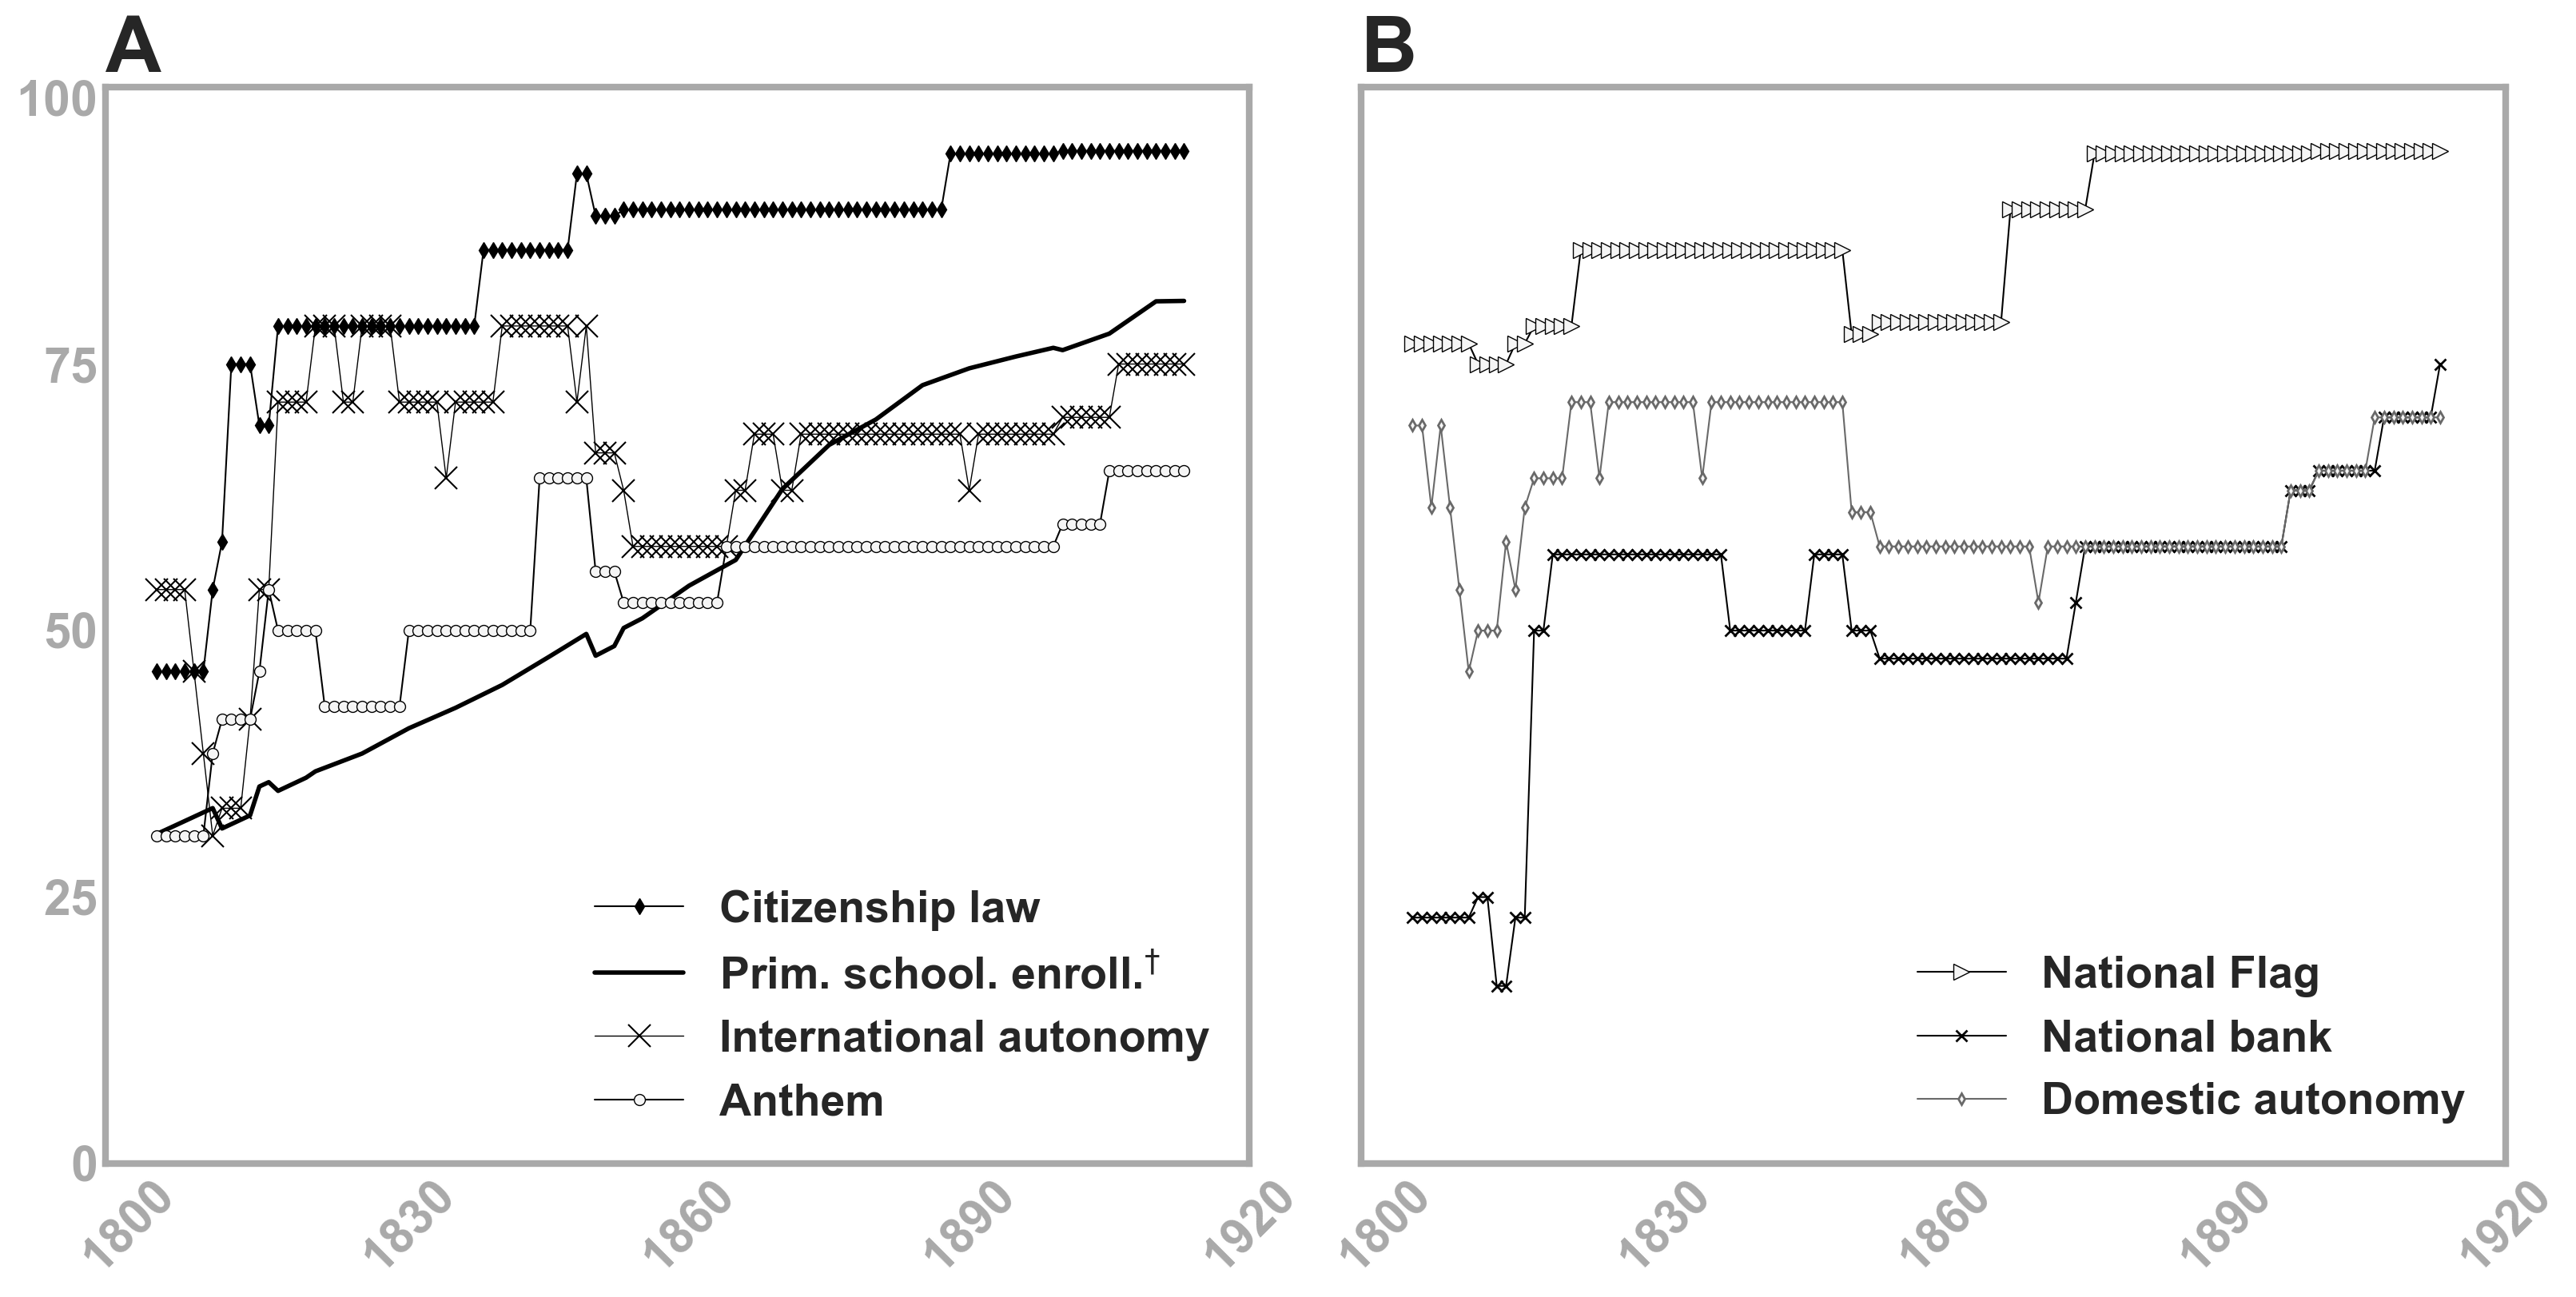

In [18]:
# ---------------------------------------------------------------
# Aesthetic parameters
# ---------------------------------------------------------------
fig, axs = plt.subplots(1, 2, layout="constrained", figsize=(16,8), sharex=True, sharey=True)
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
font_weight = "bold"
font_size = 22
plt.rc('axes', edgecolor='darkgray')
plt.rc('xtick', color='darkgray')
plt.rc('ytick', color='darkgray')
plt.setp(axs[0].spines.values(), color=tick_color, lw=3);
plt.setp(axs[1].spines.values(), color=tick_color, lw=3);
plt.ylim(0, 101)


# ---------------------------------------------------------------
# A
# ---------------------------------------------------------------
axs[0].set_title("A", fontsize=35, weight=font_weight, loc='left')
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_citizenship'].mean()*100,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
        )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_xtr_enrll'].mean(),
         lw=2, 
         marker=None, 
         color=title_color,
        )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_int_autonomy_b'].mean()*100, 
         lw=.5, 
         marker='x', 
         color=title_color, 
         markersize=10, 
         markeredgewidth=.75, 
         markeredgecolor=title_color, 
         markerfacecolor=data_color,
        )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_anthem'].mean()*100, 
         lw=.75, 
         marker='o', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color, 
         markerfacecolor=data_color,
        )
axs[0].legend(['Citizenship law', 
            'Prim. school. enroll.$^{†}$',
            'International autonomy',
            'Anthem'],
          loc='lower right',
          prop={'size': 20, 'weight': 'bold'});

axs[0].set_yticks(range(0,101,25))
axs[0].set_yticklabels(range(0,101,25), weight=font_weight, fontsize=font_size)
axs[0].set_xticks(range(1800,1921,30))
axs[0].set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=font_size)


# ---------------------------------------------------------------
# B
# ---------------------------------------------------------------
axs[1].set_title("B", fontsize=35, weight=font_weight, loc='left')
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_flag'].mean()*100,
         lw=.75, 
         marker='>', 
         color=title_color, 
         markersize=7, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
        )

axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_nat_bank'].mean()*100,
         lw=.75, 
         marker='x', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=1 , 
         markeredgecolor=title_color,
         markerfacecolor=title_color,
        )
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_dom_autonomy_b'].mean()*100,
         lw=.75, 
         marker='d', 
         color=edge_color, 
         markersize=3.5, 
         markeredgewidth=1, 
         markeredgecolor=edge_color, 
         markerfacecolor=data_color,
        )
axs[1].set_xticks(range(1800,1921,30))
axs[1].set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=font_size)

axs[1].legend(['National Flag',
               'National bank',
               'Domestic autonomy',
              ],
              loc='lower right',
              prop={'size': 20, 'weight': 'bold'});

plt.savefig(FIG+"figure1.pdf")

# Scientization Indicators

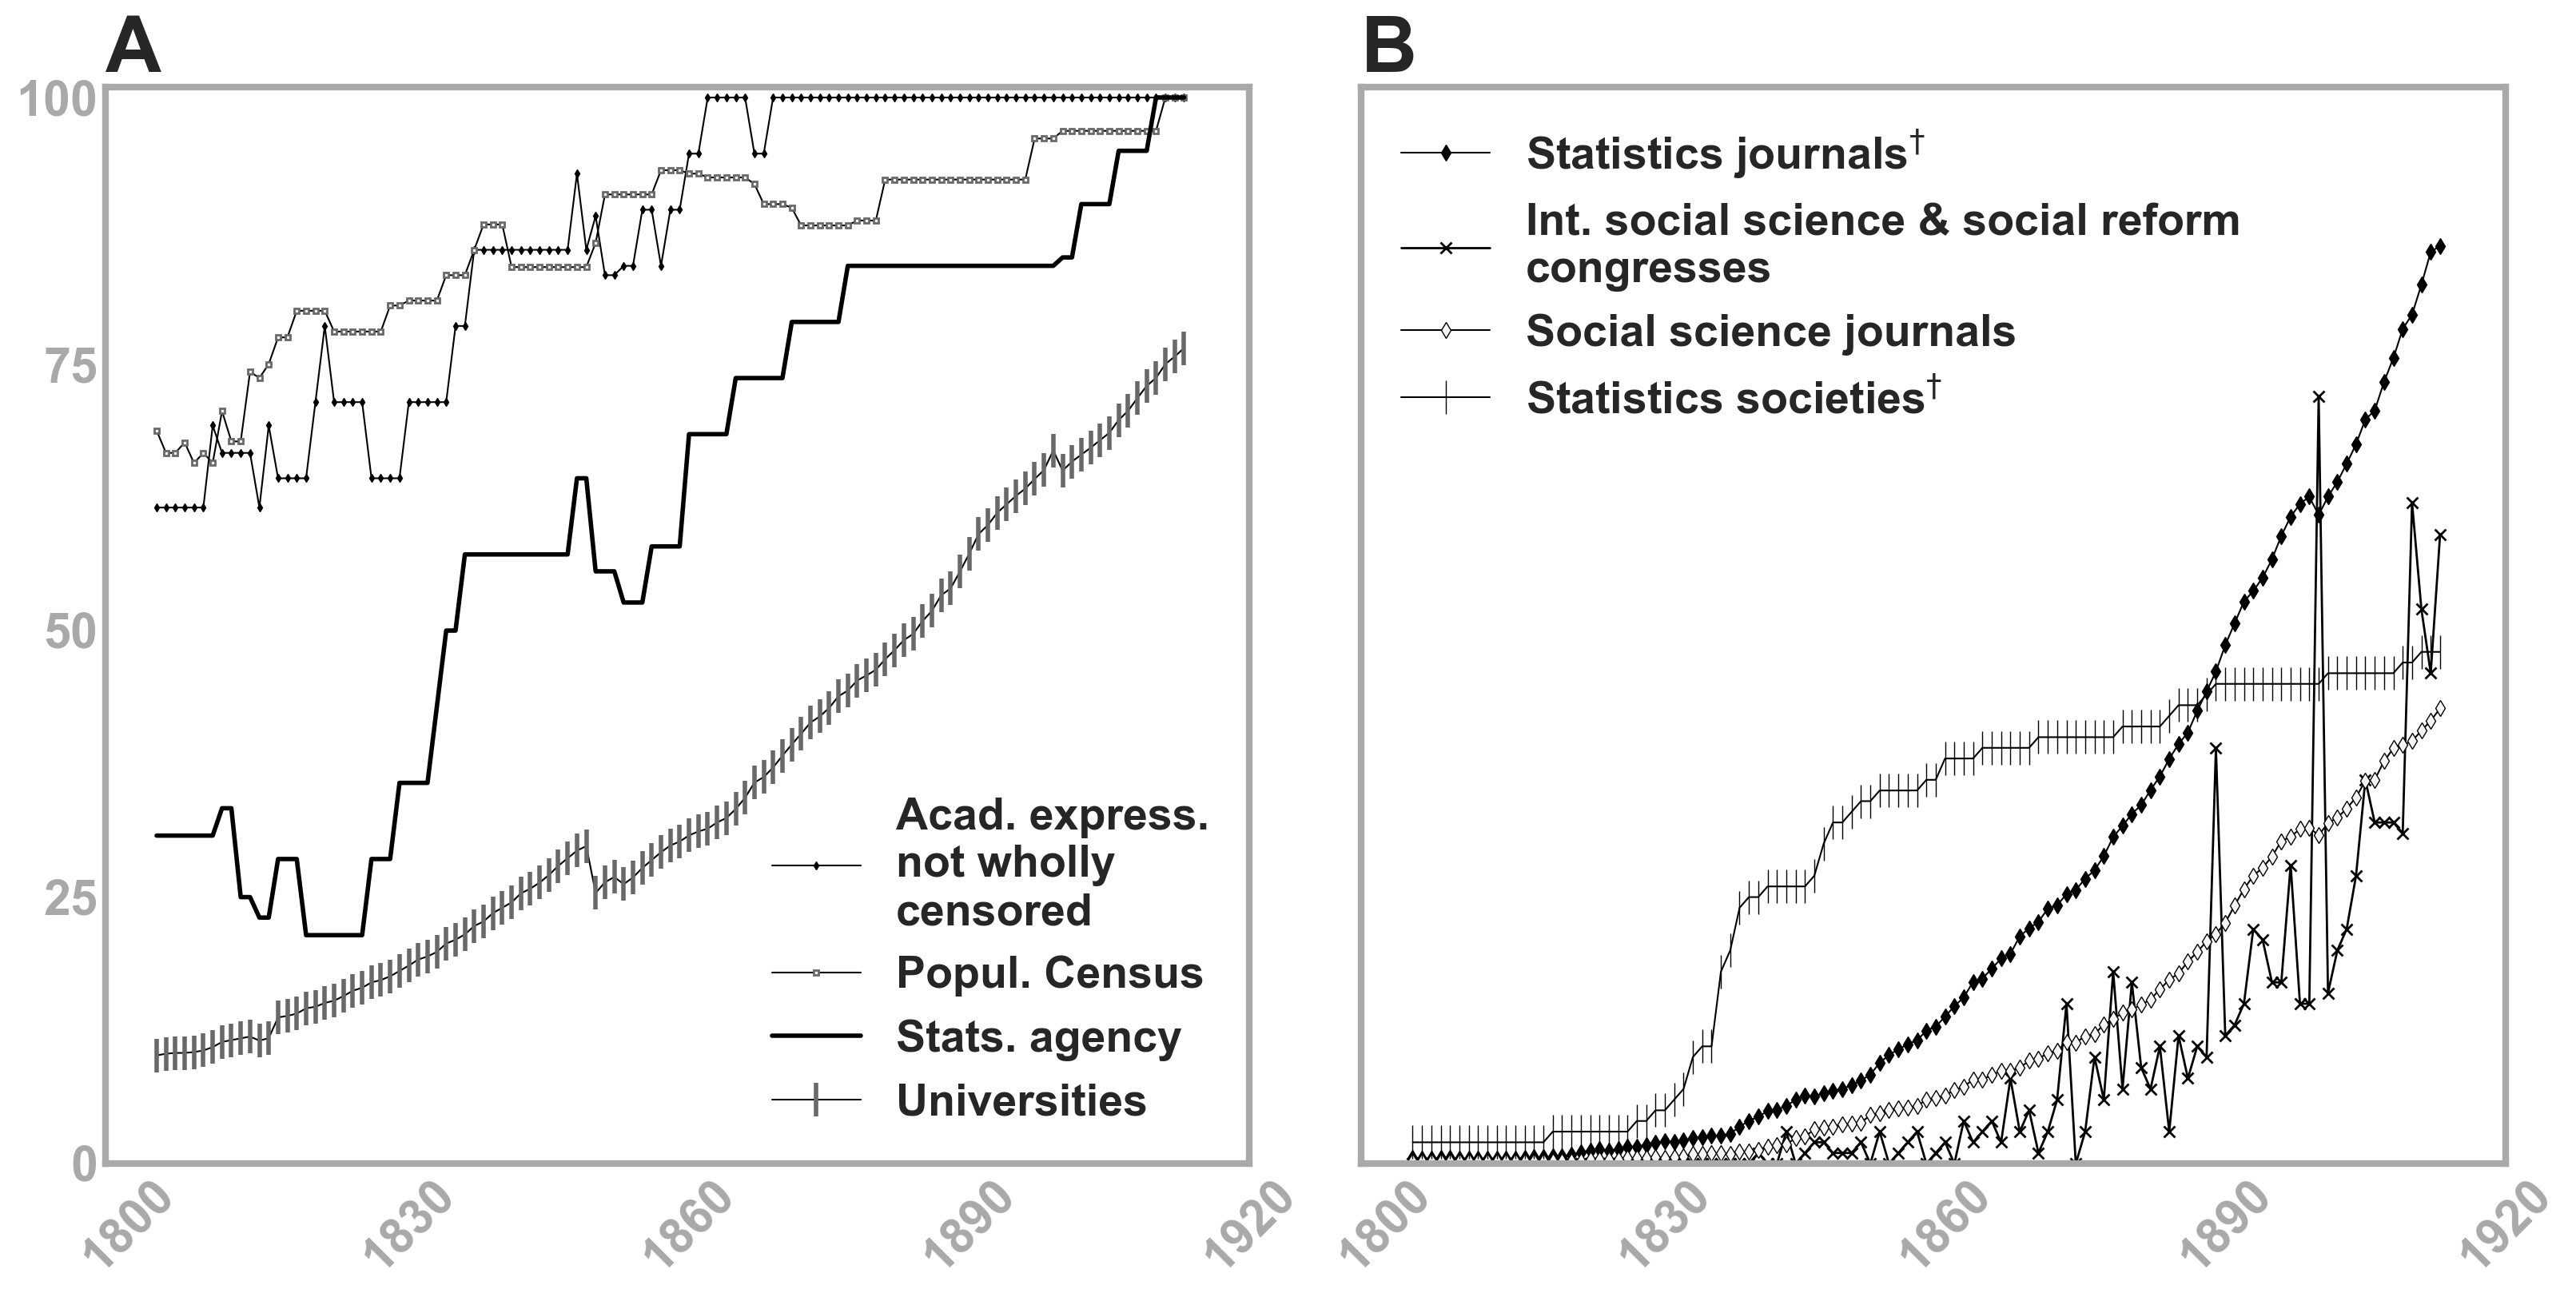

In [17]:
# ---------------------------------------------------------------
# Aesthetic parameters
# ---------------------------------------------------------------
fig, axs = plt.subplots(1, 2, layout="constrained", figsize=(16,8), sharex=True, sharey=True)
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
font_weight = "bold"
font_size = 22
plt.rc('axes', edgecolor='darkgray')
plt.rc('xtick', color='darkgray')
plt.rc('ytick', color='darkgray')
plt.setp(axs[0].spines.values(), color=tick_color, lw=3);
plt.setp(axs[1].spines.values(), color=tick_color, lw=3);
plt.ylim(0, 101)



# ---------------------------------------------------------------
# A
# ---------------------------------------------------------------
axs[0].set_title("A", fontsize=35, weight=font_weight, loc='left')
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_acad_free_b'].mean()*100,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=2.5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=title_color,
        )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_census_ever'].mean()*100,
         lw=.75, 
         marker='s', 
         color=title_color, 
         markersize=2.5, 
         markeredgewidth=1, 
         markeredgecolor=edge_color, 
         markerfacecolor=data_color,
        )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_stats_agency'].mean()*100,
         lw=2, 
         marker=None, 
         color=title_color, 
         markersize=10, 
         markeredgewidth=1, 
         markeredgecolor=title_color, 
        )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_unis'].mean(),
         lw=.75, 
         marker='|', 
         color=title_color, 
         markersize=15, 
         markeredgewidth=2, 
         markeredgecolor=edge_color, 
         markerfacecolor="None",
        )

axs[0].set_yticks(range(0,101,25))
axs[0].set_yticklabels(range(0,101,25), weight=font_weight, fontsize=font_size)
axs[0].set_xticks(range(1800,1921,30))
axs[0].set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=font_size)

axs[0].legend(['Acad. express.\nnot wholly\ncensored',
            'Popul. Census',
            'Stats. agency', 
            'Universities',
            'Stats. journals', 
            ],
          loc='lower right',
          prop={'size': 20, 'weight': 'bold'});


# ---------------------------------------------------------------
# B
# ---------------------------------------------------------------
axs[1].set_title("B", fontsize=35, weight=font_weight, loc='left')
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_stats_journals'].mean()/25,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=None,
        )
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_confs_sci_ref'].mean(),
         lw=1, 
         marker='x', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=1, 
         markeredgecolor=title_color, 
        )

axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_soc_journals'].mean()/20,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
        )

axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_societies'].mean(),
         lw=.75, 
         marker='|', 
         color=title_color, 
         markersize=15, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
        )
            
axs[1].set_xticks(range(1800,1921,30))
axs[1].set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=font_size)
plt.legend(['Statistics journals$^{†}$' ,
            'Int. social science & social reform\ncongresses',
            'Social science journals', 
            'Statistics societies$^{†}$'],
          loc='upper left',
          prop={'size': 20, 'weight': 'bold'});

plt.savefig(FIG+"figure2.pdf")

# Composites

In [9]:
states_df['sy_model'] = (states_df['sy_nat_state'] + states_df['sy_sci_state']) / 2

In [10]:
def gen_plot(ax, ys_tpl, fontsize=12, hide_xs=False, lw=1):
    '''
    Takes a plt.subplot and a tuple('state', state_df[DVs])
    Plots the state's dvs over year.
    
    '''
    
    # Grab state name
    state = ys_tpl[0]
    if state == "United States of America":
        state = "United States"
        
    # Grab year array
    X = ys_tpl[1].iloc[:,0]
    
    # Set DV line options
    ax.plot(X, ys_tpl[1].iloc[:,1], lw=lw, color='lightgray')
    ax.plot(X, ys_tpl[1].iloc[:,2], lw=lw, color=edge_color)
    ax.plot(X, ys_tpl[1].iloc[:,3], lw=lw, color=title_color)

    if hide_xs:
        ax.set_xticks(range(1800,1921,30))
        ax.set_xticklabels([])
        ax.set_yticks(range(-2,4,2))
        ax.set_yticklabels(range(-2,4,2), weight=font_weight, fontsize=fontsize)
        ax.set_title(f"{state}", weight=font_weight, fontsize=fontsize)
        
    else:
        ax.set_xticks(range(1800,1921,30))
        ax.set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=fontsize)
        ax.set_yticks(range(-2,4,2))
        ax.set_yticklabels(range(-2,4,2), weight=font_weight, fontsize=fontsize)
        ax.set_title(f'{state}', weight=font_weight, fontsize=fontsize)

In [11]:
# Define global of dvs, incl year
DVS = ['year','sy_nat_state','sy_sci_state','sy_model']

# Create a dict of tuples dct{i:('state', state_df[DVS])}
ys = {0: ("West-wide", states_df.groupby('year')[DVS].mean())}
for i, state_tpl in enumerate(states_df.groupby('state')[DVS]):
    ys[i+1] = state_tpl

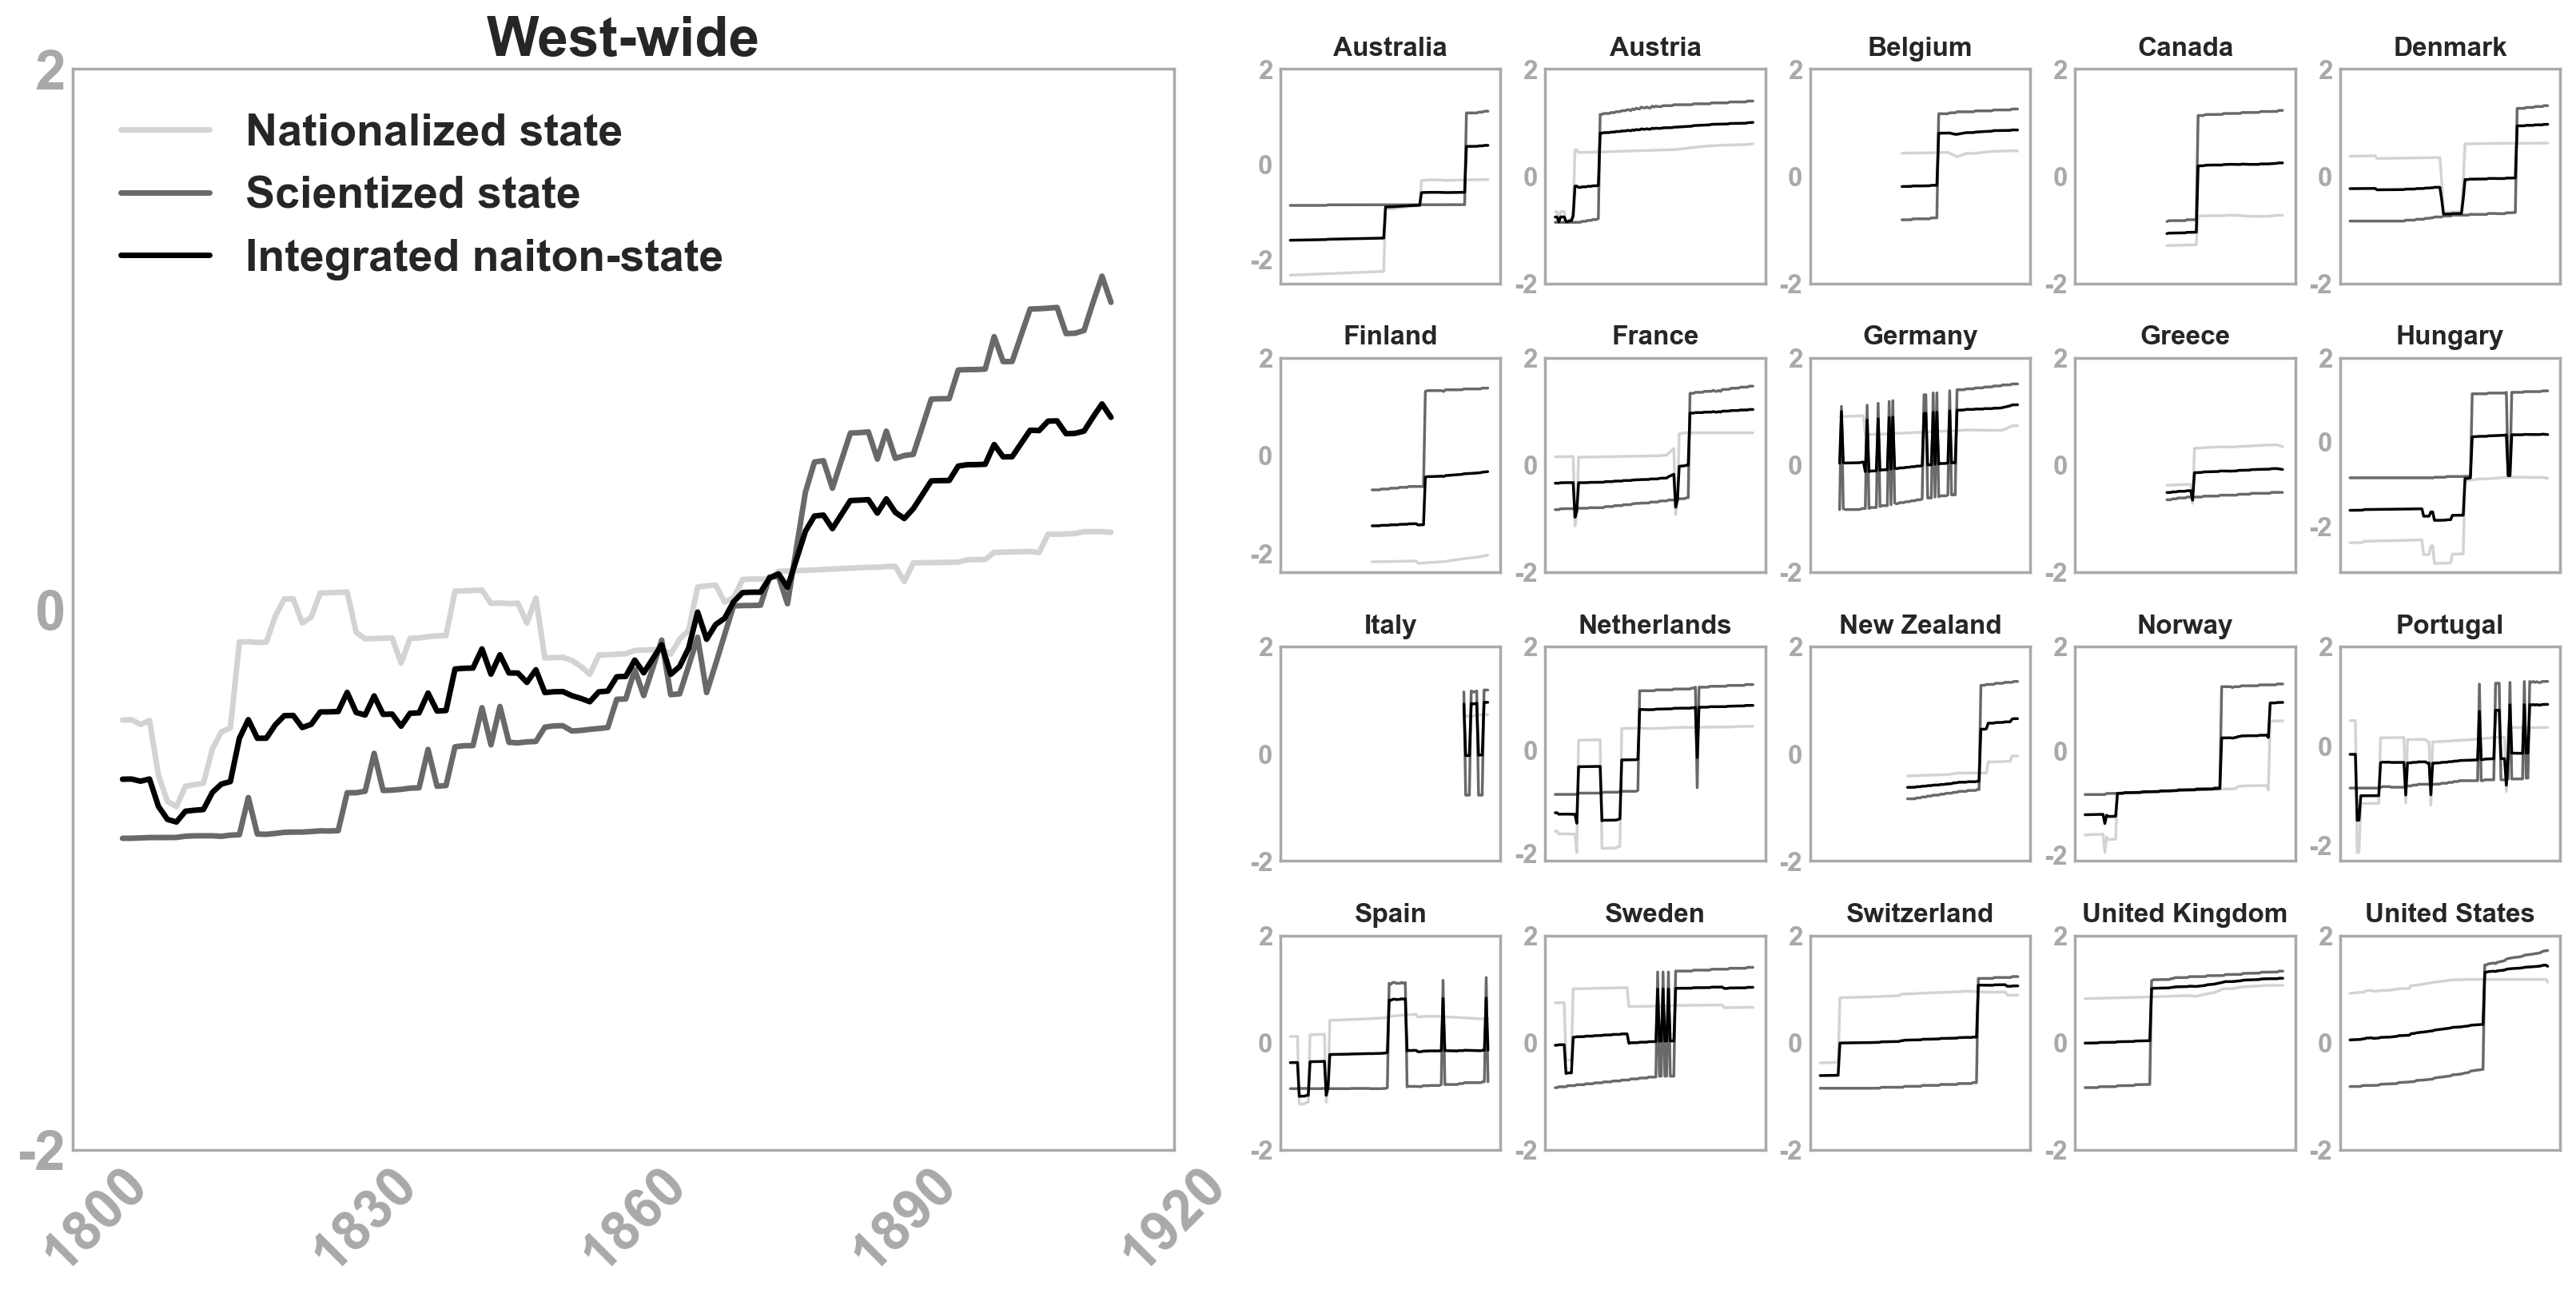

In [16]:
# Set aesthetic parameters
fig = plt.figure(layout='constrained', figsize=(16, 8))
plt.rc('axes', edgecolor='darkgray')
plt.rc('xtick', color='darkgray')
plt.rc('ytick', color='darkgray')

# Superordinate plot will comprise 4 X 10 subplots
plots = []

# West-year trend will fill in all 20 subplots on left
left_side = plt.subplot(4, 10, (1, 35))
plots.append(left_side)

# Right HALF will be 20 country-year trend lines
# First, get coordinates of subplots
right_side = list(range(6,11))
for i in range(10,40,10):
    right_side.extend(list((np.asarray((range(6,11)))+i)))

# Next, sequentially create each right-side subplot
# Add to plot list
for i in right_side:
    plots.append(plt.subplot(4, 10, i))

# Plot each subplot in the list
for i, plot in enumerate(plots):
    # First, the west-year trend
    if i == 0:
        gen_plot(plot, ys[i], fontsize=25, lw=2.5)
    # then all others:
    else:
        gen_plot(plot, ys[i], fontsize=12, lw=1.25, hide_xs=True)

# Add legend
fig.legend(['Nationalized state',
            'Scientized state',
            'Integrated naiton-state'],
          loc=(.04,.77),
          prop={'size': 20, 'weight': 'bold'});

plt.savefig(FIG+"figure3.pdf")